## HW 3 
The package I am using is Keras -- tf.keras. <br>
Pydrive, oauth2client.client is for importting files online.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
#from PIL import Image
#from scipy import ndimage
#import os
#import keras 
#from tensorflow.keras import *
#from keras.models import Sequential
#from keras.layers import Dense
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
import tensorflow as tf
from tensorflow import keras
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


## Cat Example 
# Load Data



In [0]:
def load_data(train_file, test_file):
    # Load the training data
    train_dataset = h5py.File(train_file,'r')
    
    # Separate features(x) and labels(y) for training set
    train_set_x_orig = train_dataset['train_set_x'][:]
    train_set_y_orig = train_dataset['train_set_y'][:]

    # Load the test data
    test_dataset = h5py.File(test_file,'r')
    
    # Separate features(x) and labels(y) for training set
    test_set_x_orig = test_dataset['test_set_x'][:]
    test_set_y_orig = test_dataset['test_set_y'][:]

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
downloaded1 = drive.CreateFile({'id':"1BPvOIRcSW-vddOR82Q2S4q52doIteRSr"})  # replace the id with id of file you want to access
downloaded1.GetContentFile('train_catvnoncat.h5')  
downloaded2 = drive.CreateFile({'id':"1n4KuJ3VhS2ZDMFMsU3FHIEJNNH6-ghSy"}) 
downloaded2.GetContentFile('test_catvnoncat.h5')  
train_file="train_catvnoncat.h5"
test_file="test_catvnoncat.h5"

train_x_orig, train_y, test_x_orig, test_y, classes = load_data(train_file, test_file)

In [85]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1)   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1)

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
train_y = train_y.T
test_x = test_x_flatten/255.
test_y = test_y.T


print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (209, 12288)
test_x's shape: (50, 12288)


# Setting model 
# Model 1: All same hyperparameters as in HW2

Using "add" to construct a same two layer network first.

In [0]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=12288, kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))

Compile the model with a learning rate of 0.0075 as the old model.

In [0]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.0075, momentum=0.0, nesterov=False, decay=0.0,))

Then fit the data with same number of epochs and batch_size.

In [45]:
model.fit(train_x, train_y, epochs=2500, batch_size=train_x.shape[0])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 2ms/step - loss: 0.6926
Epoch 2/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6923
Epoch 3/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6920
Epoch 4/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6916
Epoch 5/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6913
Epoch 6/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 7/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6906
Epoch 8/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6902
Epoch 9/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6899
Epoch 10/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6895
Epoch 11/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6891
Epoch 12/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6887
Epoch 13/25

Make predictions 

In [48]:
test_pred = model.predict(test_x, batch_size=50)
test_acc = np.sum((test_pred>0.5) == test_y) / test_y.shape[0]
print('Test acc = {:.4f}%'.format(test_acc * 100))

Test acc = 66.0000%


With all same hyperparameters and activation function, a train loss of 0.1250,test acc=66.0% is reached. Compared with model from HW2 which has a  train loss of 0.0485, test acc=72.0%. The only difference is the seed to start.<br>
66% vs. 74% emmmm, not really a great change, let's try on different epochs first and see what happens.


# Model 2: Modify
First we try with a moderately smaller epoch number of 2000, and print the history of accuracy

In [56]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=12288, kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.0075, momentum=0.0, nesterov=False, decay=0.0,))
history = model.fit(train_x, train_y, epochs=2000, batch_size=train_x.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6929
Epoch 2/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6925
Epoch 3/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6922
Epoch 4/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6918
Epoch 5/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6914
Epoch 6/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6910
Epoch 7/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6906
Epoch 8/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.6902
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6898
Epoch 10/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6894
Epoch 11/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6889
Epoch 12/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6885
Epoch 13/2000
1/1 [==============================

In [58]:
test_pred = model.predict(test_x, batch_size=50)
test_acc = np.sum((test_pred>0.5) == test_y) / test_y.shape[0]
print('Test acc = {:.4f}%'.format(test_acc * 100))

Test acc = 70.0000%


The train loss is 0.0578, larger than 0.0485 from model 1 and the test acc is slightly better with a 2% increase, which indicates the possible existence of overfitting. Let's see the losses during training and try with smaller number of epochs.

dict_keys(['loss'])


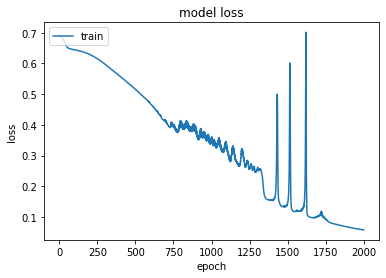

In [61]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As the loss decreases rapidly from 0 to 750, it starts to oscillate and it's getting large near 1500. Therefore, let's try with 750, the endpoint of smooth decrease.

In [74]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=12288, kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.0075, momentum=0.0, nesterov=False, decay=0.0,))
history = model.fit(train_x, train_y, epochs=750, batch_size=train_x.shape[0])

Epoch 1/750
1/1 [==============================] - 0s 4ms/step - loss: 0.6929
Epoch 2/750
1/1 [==============================] - 0s 2ms/step - loss: 0.6925
Epoch 3/750
1/1 [==============================] - 0s 2ms/step - loss: 0.6920
Epoch 4/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6915
Epoch 5/750
1/1 [==============================] - 0s 2ms/step - loss: 0.6910
Epoch 6/750
1/1 [==============================] - 0s 2ms/step - loss: 0.6906
Epoch 7/750
1/1 [==============================] - 0s 2ms/step - loss: 0.6901
Epoch 8/750
1/1 [==============================] - 0s 4ms/step - loss: 0.6895
Epoch 9/750
1/1 [==============================] - 0s 2ms/step - loss: 0.6890
Epoch 10/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6884
Epoch 11/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6879
Epoch 12/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6873
Epoch 13/750
1/1 [==============================] - 0s 1ms/st

In [75]:
test_pred = model.predict(test_x, batch_size=50)
test_acc = np.sum((test_pred>0.5) == test_y) / test_y.shape[0]
print('Test acc = {:.4f}%'.format(test_acc * 100))

Test acc = 80.0000%


This is actually better with a loss of 0.3733. It is likely that we're reaching the peak before overfitting. Let's try it with smaller batch sizes.

In [106]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=12288, kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.0075, momentum=0.0, nesterov=False, decay=0.0,))
history50 = model.fit(train_x, train_y, validentaion_split = 0.15, epochs=750, batch_size=50)

Epoch 1/750
5/5 [==============================] - 0s 4ms/step - loss: 0.6928
Epoch 2/750
5/5 [==============================] - 0s 5ms/step - loss: 0.6922
Epoch 3/750
5/5 [==============================] - 0s 4ms/step - loss: 0.6909
Epoch 4/750
5/5 [==============================] - 0s 4ms/step - loss: 0.6885
Epoch 5/750
5/5 [==============================] - 0s 4ms/step - loss: 0.6874
Epoch 6/750
5/5 [==============================] - 0s 4ms/step - loss: 0.6833
Epoch 7/750
5/5 [==============================] - 0s 6ms/step - loss: 0.6815
Epoch 8/750
5/5 [==============================] - 0s 4ms/step - loss: 0.6765
Epoch 9/750
5/5 [==============================] - 0s 4ms/step - loss: 0.6706
Epoch 10/750
5/5 [==============================] - 0s 4ms/step - loss: 0.6642
Epoch 11/750
5/5 [==============================] - 0s 4ms/step - loss: 0.6577
Epoch 12/750
5/5 [==============================] - 0s 4ms/step - loss: 0.6675
Epoch 13/750
5/5 [==============================] - 0s 4ms/st

In [107]:
test_pred = model.predict(test_x, batch_size=50)
test_acc = np.sum((test_pred>0.5) == test_y) / test_y.shape[0]
print('Test acc = {:.4f}%'.format(test_acc * 100))

Test acc = 72.0000%


It's not getting better with a batch size of 50 but the train loss is significantly decreased with small batch size = more iterations.

In [150]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=12288, kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.0075, momentum=0.0, nesterov=False, decay=0.0,))
history100 = model.fit(train_x, train_y, validentaion_split = 0.15, epochs=750, batch_size=100)

Epoch 1/750
3/3 [==============================] - 0s 5ms/step - loss: 0.6888
Epoch 2/750
3/3 [==============================] - 0s 5ms/step - loss: 0.6913
Epoch 3/750
3/3 [==============================] - 0s 5ms/step - loss: 0.6888
Epoch 4/750
3/3 [==============================] - 0s 5ms/step - loss: 0.6845
Epoch 5/750
3/3 [==============================] - 0s 5ms/step - loss: 0.6809
Epoch 6/750
3/3 [==============================] - 0s 5ms/step - loss: 0.6776
Epoch 7/750
3/3 [==============================] - 0s 6ms/step - loss: 0.6818
Epoch 8/750
3/3 [==============================] - 0s 5ms/step - loss: 0.6802
Epoch 9/750
3/3 [==============================] - 0s 5ms/step - loss: 0.6757
Epoch 10/750
3/3 [==============================] - 0s 6ms/step - loss: 0.6629
Epoch 11/750
3/3 [==============================] - 0s 5ms/step - loss: 0.6612
Epoch 12/750
3/3 [==============================] - 0s 5ms/step - loss: 0.6717
Epoch 13/750
3/3 [==============================] - 0s 5ms/st

In [151]:
test_pred = model.predict(test_x, batch_size=100)
test_acc = np.sum((test_pred>0.5) == test_y) / test_y.shape[0]
print('Test acc = {:.4f}%'.format(test_acc * 100))

Test acc = 70.0000%


The loss is getting smaller but train accuracy does not improve, which shows a hint of overfitting. Let's try different learning rate instead.
0.0075 -> 0.075 a huge step

In [156]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=12288, kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.075, momentum=0.0, nesterov=False, decay=0.0,))
history100 = model.fit(train_x, train_y, epochs=750, batch_size=train_x.shape[0])

Epoch 1/750
1/1 [==============================] - 0s 4ms/step - loss: 0.6935
Epoch 2/750
1/1 [==============================] - 0s 2ms/step - loss: 0.6914
Epoch 3/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6895
Epoch 4/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6877
Epoch 5/750
1/1 [==============================] - 0s 2ms/step - loss: 0.6859
Epoch 6/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6840
Epoch 7/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6818
Epoch 8/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6790
Epoch 9/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6751
Epoch 10/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6696
Epoch 11/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6625
Epoch 12/750
1/1 [==============================] - 0s 1ms/step - loss: 0.6553
Epoch 13/750
1/1 [==============================] - 0s 2ms/st

In [157]:
test_pred = model.predict(test_x, batch_size=100)
test_acc = np.sum((test_pred>0.5) == test_y) / test_y.shape[0]
print('Test acc = {:.4f}%'.format(test_acc * 100))

Test acc = 56.0000%


We can see that the loss fluctuates greatly and so does the test acc by running several times, which means the learning rate might be too big, so I tried 0.03, 0.02, 0.009 and numbers smaller than 0.0075 including 0.006, 0.003. All of them gives unstable accuracy usually less than 70%. Therefore, 0.0075 might be the best we have for 750 epochs, but how about large learning rate with less epochs, which might result in divergence but quick convergence is also possible if lucky.

In [266]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=12288, kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.07, momentum=0.0, nesterov=False, decay=0.0,))
history100 = model.fit(train_x, train_y, epochs=300, batch_size=train_x.shape[0])

Epoch 1/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6939
Epoch 2/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6913
Epoch 3/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6891
Epoch 4/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6868
Epoch 5/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6841
Epoch 6/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6803
Epoch 7/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6748
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6671
Epoch 9/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6583
Epoch 10/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6514
Epoch 11/300
1/1 [==============================] - 0s 1ms/step - loss: 0.6480
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 0.6467
Epoch 13/300
1/1 [==============================] - 0s 2ms/st

In [267]:
test_pred = model.predict(test_x, batch_size=100)
test_acc = np.sum((test_pred>0.5) == test_y) / test_y.shape[0]
print('Test acc = {:.4f}%'.format(test_acc * 100))

Test acc = 78.0000%


By running with epochs of 200, 300, 500 and learning rate of 0.5, 0.3, 0.1, 0.07 respectively and test for several times. We can see that we can get a decent model with 300 epochs and a learning rate of 0.07. However, the best model so far is with 750 epochs and same hyperparameters as in HW2 which has a test acc of 80%.

## Film review
# Load Data

In [0]:
def load_data(train_file, test_file):
    train_dataset = []
    test_dataset = []
    
    # Read the training dataset file line by line
    for line in open(train_file, 'r'):
        train_dataset.append(line.strip())
        
    for line in open(test_file, 'r'):
        test_dataset.append(line.strip())
    return train_dataset, test_dataset

In [0]:
downloaded3 = drive.CreateFile({'id':"1MaesUgfSPflYxKiJDqbRwC9rLwlrLPSA"})  # replace the id with id of file you want to access
downloaded3.GetContentFile('test_imdb.txt') 
downloaded4 = drive.CreateFile({'id':"1MnA03_EfvyJJkPWh0Wl01Cvwa-J4JKw4"})
downloaded4.GetContentFile('train_imdb.txt') 
train_file = "train_imdb.txt"
test_file = "test_imdb.txt"
train_dataset, test_dataset = load_data(train_file, test_file)

In [0]:
# This is just how the data is organized. The first 50% data is positive and the rest 50% is negative for both train and test splits.
y = [1 if i < len(train_dataset)*0.5 else 0 for i in range(len(train_dataset))]

In [275]:
# Explore your dataset 
m_train = len(train_dataset)
m_test = len(test_dataset)

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))

Number of training examples: 1001
Number of testing examples: 201


In [0]:
import re
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "


def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

train_dataset_clean = preprocess_reviews(train_dataset)
test_dataset_clean = preprocess_reviews(test_dataset)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True, stop_words="english", max_features=2000)
cv.fit(train_dataset_clean)
X = cv.transform(train_dataset_clean)
X_test = cv.transform(test_dataset_clean)

X = np.array(X.todense()).astype(float)
X_test = np.array(X_test.todense()).astype(float)
y = np.array(y)

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.80
)

# This is just to correct the shape of the arrays as required by the two_layer_model
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)


Set same model as in HW2


In [288]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=X_train.shape[1], kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.0075, momentum=0.0, nesterov=False, decay=0.0,))

history = model.fit(X_train, y_train, epochs=2500, batch_size=X_train.shape[0])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 2/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 3/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 4/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 5/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 6/2500
1/1 [==============================] - 0s 4ms/step - loss: 0.6932
Epoch 7/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 8/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 9/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 10/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 11/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 12/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 13/25

In [289]:
val_pred = model.predict(X_val, batch_size=X_val.shape[0])
val_acc = np.sum((val_pred>0.5) == y_val) / y_val.shape[0]
print('Val acc = {:.4f}%'.format(val_acc * 100))

Val acc = 76.6169%


As we can see, the model with same hyperparamters reaches an accuracy of 76.6169% which is a little eless than 83.58208% as in HW2,but the train loss is much less than the test loss, which indicates possible room for improving with smaller loss. Let's try a greater learning rate.

In [291]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=X_train.shape[1], kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0, nesterov=False, decay=0.0,))

model.fit(X_train, y_train, epochs=2500, batch_size=X_train.shape[0])
val_pred = model.predict(X_val, batch_size=X_val.shape[0])
val_acc = np.sum((val_pred>0.5) == y_val) / y_val.shape[0]
print('Val acc = {:.4f}%'.format(val_acc * 100))

Streaming output truncated to the last 5000 lines.
Epoch 2/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 3/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 4/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 5/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 6/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 7/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 8/2500
1/1 [==============================] - 0s 4ms/step - loss: 0.6932
Epoch 9/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 10/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 11/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 12/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 13/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.69

This getting pretty well and the loss is also smaller. Let's continue to increase learning rate/epochs a little to see if it reaches the peak before overfitting.

In [292]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=X_train.shape[1], kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.015, momentum=0.0, nesterov=False, decay=0.0,))

model.fit(X_train, y_train, epochs=2500, batch_size=X_train.shape[0])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 2/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 3/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 4/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 5/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 6/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 7/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 8/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 9/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 10/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 11/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 12/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 13/25

In [294]:
val_pred = model.predict(X_val, batch_size=X_val.shape[0])
val_acc = np.sum((val_pred>0.5) == y_val) / y_val.shape[0]
print('Val acc = {:.4f}%'.format(val_acc * 100))

Val acc = 85.0746%


The accuracy is still getting better! Let's try with more epochs to reach an evenly less loss, hopefully more accurate. 

In [296]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=X_train.shape[1], kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.015, momentum=0.0, nesterov=False, decay=0.0,))

model.fit(X_train, y_train, epochs=3000, batch_size=X_train.shape[0])
val_pred = model.predict(X_val, batch_size=X_val.shape[0])
val_acc = np.sum((val_pred>0.5) == y_val) / y_val.shape[0]
print('Val acc = {:.4f}%'.format(val_acc * 100))

Streaming output truncated to the last 5000 lines.
Epoch 502/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6923
Epoch 503/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6923
Epoch 504/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6923
Epoch 505/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6923
Epoch 506/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.6923
Epoch 507/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.6923
Epoch 508/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6923
Epoch 509/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.6923
Epoch 510/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6923
Epoch 511/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6923
Epoch 512/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6923
Epoch 513/3000
1/1 [==============================] - 0s 2

With a much smaller train loss generated by more epochs and greater learning rate, the accuracy remains the same, which implies the possibility of reaching the accuracy peak. So let's try with momentum set instead.

In [297]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=X_train.shape[1], kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=False, decay=0.0,))

model.fit(X_train, y_train, epochs=2500, batch_size=X_train.shape[0])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 2/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 3/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 4/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 5/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 6/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 7/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 8/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 9/2500
1/1 [==============================] - 0s 5ms/step - loss: 0.6931
Epoch 10/2500
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 11/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 12/2500
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 13/25

In [298]:
val_pred = model.predict(X_val, batch_size=X_val.shape[0])
val_acc = np.sum((val_pred>0.5) == y_val) / y_val.shape[0]
print('Val acc = {:.4f}%'.format(val_acc * 100))

Val acc = 82.0896%


However, we can see that with such a small loss, the accuracy decreases, which is likely the result of overfitting. Let's run it again with less epochs. 

In [313]:
model = Sequential()
model.add(Dense(units=7, activation='relu', input_dim=X_train.shape[1], kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))
model.add(Dense(units=1, activation='sigmoid',  kernel_initializer=tf.random_normal_initializer(stddev=0.01), bias_initializer='zeros'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=False, decay=0.0,))

model.fit(X_train, y_train, epochs=600, batch_size=X_train.shape[0])
val_pred = model.predict(X_val, batch_size=X_val.shape[0])
val_acc = np.sum((val_pred>0.5) == y_val) / y_val.shape[0]
print('Val acc = {:.4f}%'.format(val_acc * 100))

Epoch 1/600
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 2/600
1/1 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 3/600
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 4/600
1/1 [==============================] - 0s 2ms/step - loss: 0.6932
Epoch 5/600
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 6/600
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 7/600
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 8/600
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 9/600
1/1 [==============================] - 0s 1ms/step - loss: 0.6931
Epoch 10/600
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 11/600
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 12/600
1/1 [==============================] - 0s 2ms/step - loss: 0.6931
Epoch 13/600
1/1 [==============================] - 0s 2ms/st

By trying epochs from 200 to 2000, there is a max near 600 with an 85.5721% accuracy, slightly better than before. This is the best one found right now.
